In [218]:
from dataset.text_data import TextDataset
from models.crnn import CRNN

import torch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
from torchvision.transforms import Compose
from dataset.data_transform import Resize, Rotation, Translation, Scale, Contrast, Snow, Grid_distortion, ToTensor
transform = Compose([
        Rotation(),
        Translation(),
        # Scale(),
        Contrast(),
        # Grid_distortion(),
        Resize(size=(320, 96))
])
    
data = TextDataset(data_path='../data/', mode='pb', transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


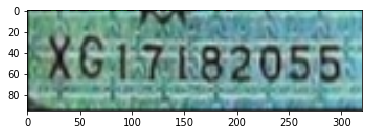

In [51]:
plt.imshow(data[162]['img'])

In [4]:
data[1620]['img']

array([[[-2.19542724e+01, -1.34598509e+01, -1.21007435e+01],
        [-2.39929336e+01, -1.54985121e+01, -1.41394046e+01],
        [-2.63713717e+01, -1.78769501e+01, -1.65178427e+01],
        ...,
        [-3.04486940e+01, -2.19542724e+01, -1.58382889e+01],
        [-3.01089171e+01, -2.12747187e+01, -1.54985121e+01],
        [-2.94293634e+01, -2.05951650e+01, -1.48189584e+01]],

       [[ 3.29411765e-01,  4.27450980e-01,  4.43137255e-01],
        [ 3.21568627e-01,  4.19607843e-01,  4.39215686e-01],
        [ 3.05882353e-01,  4.11764706e-01,  4.27450980e-01],
        ...,
        [ 3.21568627e-01,  4.27450980e-01,  4.94117647e-01],
        [ 3.05882353e-01,  4.07843137e-01,  4.74509804e-01],
        [ 2.86274510e-01,  3.96078431e-01,  4.62745098e-01]],

       [[ 3.01960784e-01,  4.03921569e-01,  4.23529412e-01],
        [ 3.05882353e-01,  4.11764706e-01,  4.31372549e-01],
        [ 3.05882353e-01,  4.19607843e-01,  4.35294118e-01],
        ...,
        [ 3.17647059e-01,  4.27450980e-01,

In [9]:
a.astype(float)/255.0

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.32156863, 0.41176471, 0.49803922],
        [0.32941176, 0.42352941, 0.50588235],
        [0.3372549 , 0.43137255, 0.51372549]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.3254902 , 0.41960784, 0.50588235],
        [0.32156863, 0.41960784, 0.49803922],
        [0.31372549, 0.41568627, 0.49411765]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.28627451, 0.39607843, 0.4745098 ],
        [0.29411765, 0.4       , 0.47843137],
        [0.29411765, 0.40392157, 0.47843137]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [2]:
model = CRNN(abc='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ', seq_proj=[20,20], backend='resnet18')

In [3]:
feat = model(torch.rand(1, 3, 96, 320))

In [4]:
feat.shape

torch.Size([1, 512, 1, 20])

In [4]:
feat.mean(2).reshape(feat.shape[0], feat.shape[1], 1, feat.shape[-1]).shape

torch.Size([1, 256, 1, 20])

In [28]:
m = torch.nn.MaxPool1d(3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

In [29]:
output.shape

torch.Size([20, 16, 24])

In [14]:
def check_label(s):
    if '*' in s:
        return True
    if len(s) != 10:
        return True
    
    if len(set(s[3:]) & set(string.ascii_uppercase)) > 0:
        return True
    
    if s[0] in string.digits:
        return True
    
    if s[0] in string.ascii_uppercase and s[1] in string.ascii_uppercase and s[2] in string.ascii_uppercase:
        return True
    
    if s[0] in string.ascii_uppercase and s[1] in string.ascii_uppercase:
        return True 
    elif s[0] in string.ascii_uppercase and s[2] in string.ascii_uppercase and s[1] in string.digits:
        return True
    else:
        return False
    

import pandas as pd
import string
submit_df1 = pd.read_csv('./tmp_rcnn_tta10_pb.csv')
submit_df2 = pd.read_csv('../multi-digit-pytorch/tmp_rcnn_tta10_cnn.csv')

submit_df1.loc[submit_df1['name'] == 'OFTUHPVE.jpg', 'label'] = submit_df2[submit_df2['name'] == 'OFTUHPVE.jpg']['label']
submit_df1[~submit_df1['label'].apply(lambda x: check_label(x))]
submit_df1.to_csv('tmp_rcnn_tta10_pb_submit.csv',index=None)

In [24]:
train_df[' label'].value_counts()

 FK75006987    2
 DY14977688    1
 HM57678768    1
 YF09713709    1
 RF04883616    1
 B8Y4979355    1
 HU41738410    1
 XC67754972    1
 RM27811709    1
 QE02413165    1
 B4P4050403    1
 XD71916912    1
 TG31922771    1
 UE24430908    1
 RD89216882    1
 C7F6056821    1
 XD23230594    1
 QB42363699    1
 RD48819927    1
 TK37727354    1
 SB24926704    1
 KR97296885    1
 A0H5463738    1
 L3Y5281746    1
 U7D1006889    1
 XE68999360    1
 C7W7921893    1
 HS34713908    1
 LS16209488    1
 QO19204908    1
              ..
 X7L2402408    1
 HW50520446    1
 HM57213128    1
 A1U0794956    1
 HU40775090    1
 HX52294749    1
 DX12478368    1
 DQ77155262    1
 DU76140469    1
 WF22565860    1
 B8Y4952064    1
 OE38946215    1
 YA92554060    1
 X7L2435055    1
 M4D8453080    1
 CT56277066    1
 WC26411948    1
 PC09844826    1
 KS73280927    1
 SC46097656    1
 TI40801569    1
 BX14585377    1
 X7L2430500    1
 XC97679860    1
 QG40862850    1
 Z2E2702764    1
 FM44140632    1
 UF66821130   

In [249]:
jpg_name = 'S3IQ6UWR.jpg,WRSFEPB6.jpg,6RQ791U5.jpg,LQIWXC7D.jpg,W7YHUGBS.jpg,Z2Y0WMS8.jpg,BG38YT9I.jpg,LGKHP9D2.jpg,2WK1NB50.jpg,CZGEIWUR.jpg,3AIWESPH.jpg,EUWTMBVP.jpg,3U81LC65.jpg,T5GDNLVK.jpg,MQUTBR86.jpg,GMXG9HN2.jpg,Z4H63MUS.jpg,B3MSFLXG.jpg,FQRMXKUT.jpg,BCO821S0.jpg,NQUR79H2.jpg,F8OKC763.jpg,HCI5KDFG.jpg,69QW5EYB.jpg,XFUBEHWM.jpg,R4TYV01I.jpg,G94H6A1M.jpg,NAX6M3PD.jpg,GHFXQ51I.jpg,9MCLZ1NW.jpg,HTBDI20U.jpg,MXRG73DQ.jpg,IMSFLWUZ.jpg,4H0WDT5G.jpg,6XY20LNA.jpg,QGCYZRPB.jpg,1PYO8ZMC.jpg,2D9QKGRM.jpg,3ZYIPRKF.jpg,IN8R12AH.jpg,85MFDNPC.jpg,IB87LDFK.jpg,8IKYD6RT.jpg,6G37TFKB.jpg,GRCX27WS.jpg,BGZEMVNG.jpg,BEDG8TNF.jpg,BX524OUQ.jpg,FH25T9AK.jpg,I8ARWLTO.jpg,X2UC4LON.jpg,3VEBP8DA.jpg,MO0URKAG.jpg,OMT3165K.jpg,EV2SXL0G.jpg,7I68BSXZ.jpg,IBYWT3RE.jpg,2AZND97O.jpg,MN8IYPB2.jpg,EN7LI18F.jpg,E3CT7AKN.jpg'
from PIL import Image
import cv2
%pylab inline

import pandas as pd
df_train_label = pd.read_csv('../../input/train_id_label.csv')

df_submit = pd.read_csv('./pb_rcnn_label.csv')
df_submit['label'] = df_submit['label'].apply(lambda x: ' '+x)
df_submit.columns = ['name', ' label']

df_submit2 = pd.read_csv('./tmp_rcnn_tta10_pb.csv')
df_submit2['label'] = df_submit2['label'].apply(lambda x: ' '+x)
df_submit2.columns = ['name', ' label']

df_train_label = pd.concat([df_train_label, df_submit, df_submit2], axis=0, ignore_index=True)

Populating the interactive namespace from numpy and matplotlib


In [251]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def columns_analysis(column=jpg_name.split(',')[:],):
    img = cv2.imread('../data/data/'+column)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lbl = df_train_label[df_train_label['name'] == column][' label'].values[0].strip()
    
    print(column+' '+img_lbl)
    plt.figure()
    plt.imshow(img)
    plt.title(column+' '+img_lbl)

interactive(children=(Dropdown(description='column', options=('S3IQ6UWR.jpg', 'WRSFEPB6.jpg', '6RQ791U5.jpg', …

S3IQ6UWR.jpg E7M4869283
WRSFEPB6.jpg Z4A7446128
6RQ791U5.jpg Z4A7446138
LQIWXC7D.jpg W4N0909106
W7YHUGBS.jpg Z4A7416950
Z2Y0WMS8.jpg Z4A7419380
BG38YT9I.jpg Z4A7446261
LGKHP9D2.jpg TA31366692
2WK1NB50.jpg Z4A7410529
CZGEIWUR.jpg Z4A7412508
3AIWESPH.jpg L9G0232259
EUWTMBVP.jpg WJ54386222
3U81LC65.jpg TG52746348
T5GDNLVK.jpg Z4A7426619
MQUTBR86.jpg P2K0497972
GMXG9HN2.jpg W4N0906309
Z4H63MUS.jpg R0K6499052
B3MSFLXG.jpg Z4A7426282
FQRMXKUT.jpg Z4A7442530
BCO821S0.jpg M1B7742865
NQUR79H2.jpg Z4A7426365
F8OKC763.jpg Z4A7426085
HCI5KDFG.jpg Z4A7446506
69QW5EYB.jpg PL15399754
XFUBEHWM.jpg Z4A7412539
R4TYV01I.jpg R0K6451936
G94H6A1M.jpg Z4A7428623
NAX6M3PD.jpg Z4A7432851
GHFXQ51I.jpg P4J2306505
9MCLZ1NW.jpg L8A2959052
HTBDI20U.jpg Z4A7402982
MXRG73DQ.jpg R8D2750085
IMSFLWUZ.jpg K2D9475529
4H0WDT5G.jpg G7W7913905
6XY20LNA.jpg Z4A7423118
QGCYZRPB.jpg K7D0842865
1PYO8ZMC.jpg MD20147722
2D9QKGRM.jpg YO00004600
3ZYIPRKF.jpg AY85132515
IN8R12AH.jpg Z4A7403861
85MFDNPC.jpg Z4A7412281
IB87LDFK.jpg Z4A

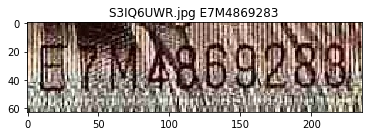

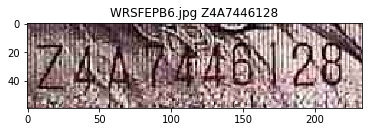

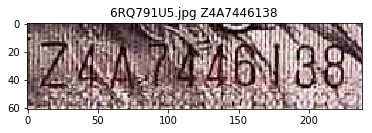

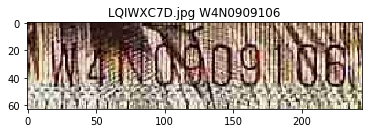

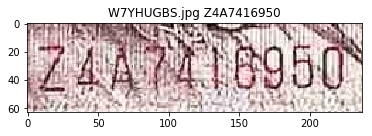

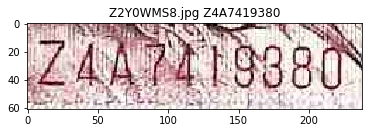

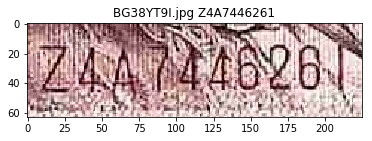

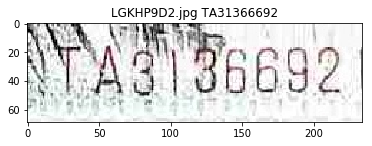

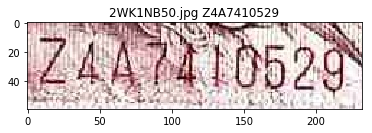

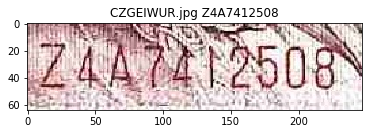

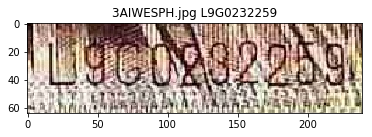

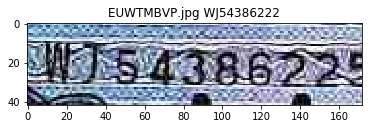

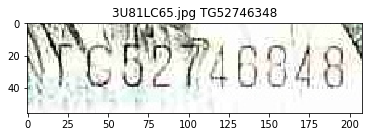

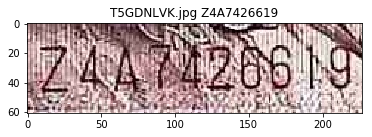

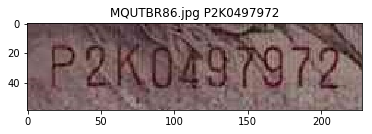

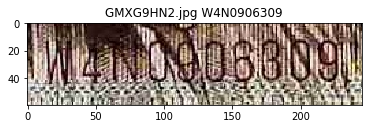

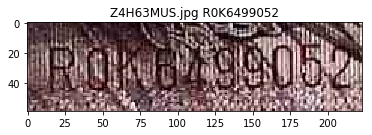

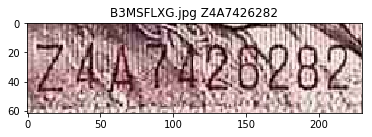

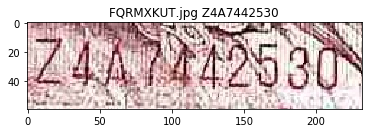

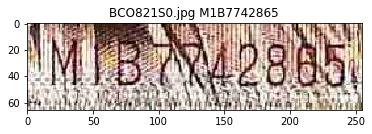

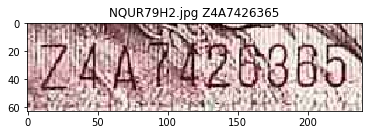

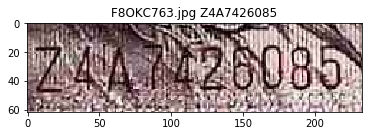

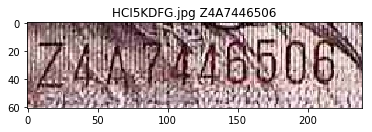

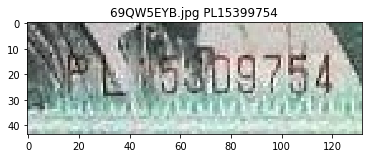

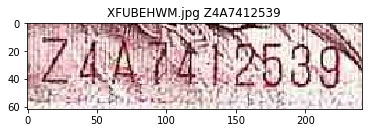

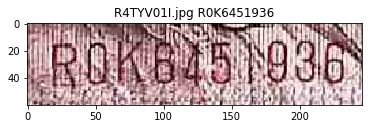

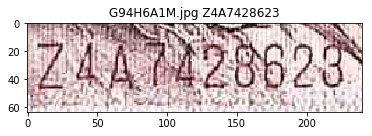

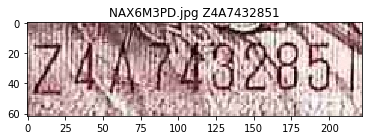

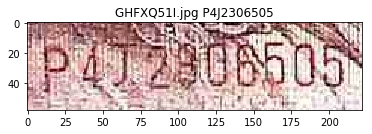

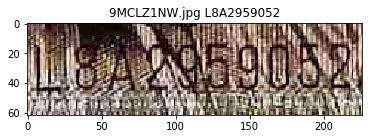

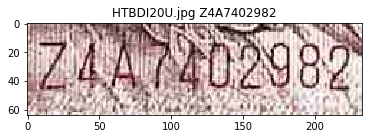

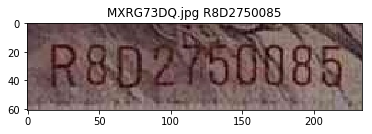

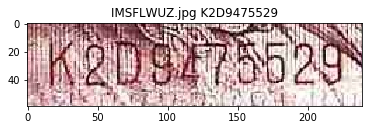

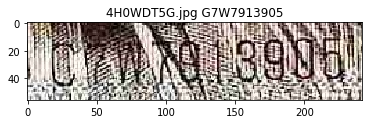

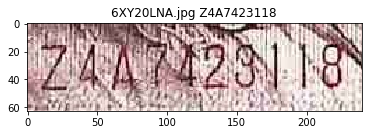

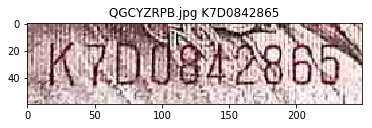

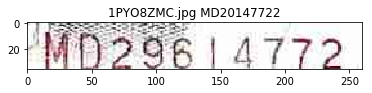

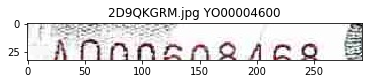

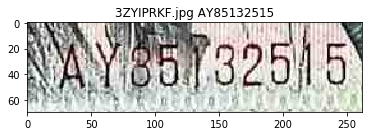

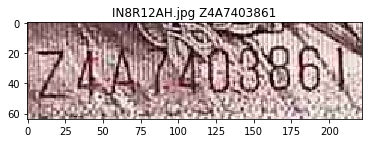

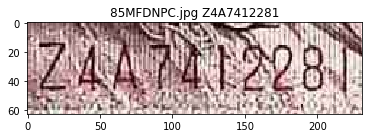

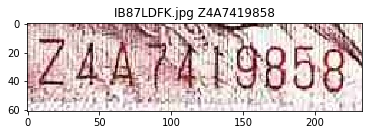

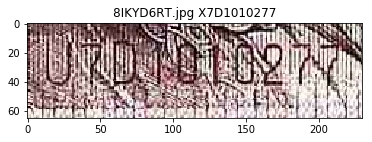

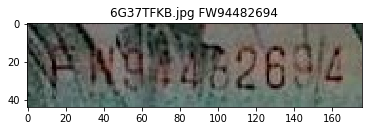

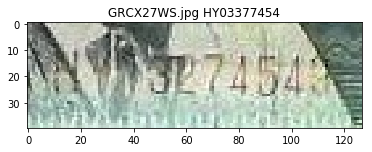

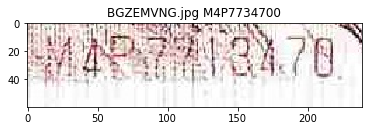

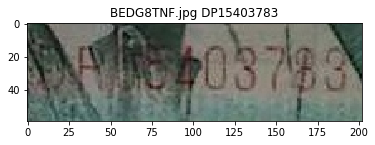

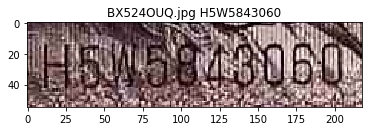

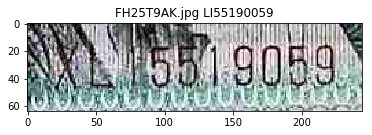

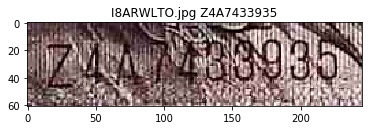

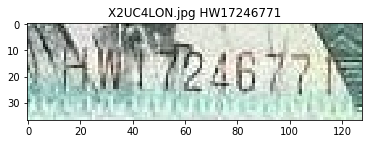

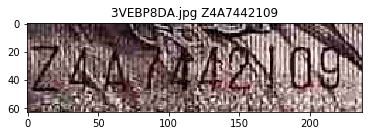

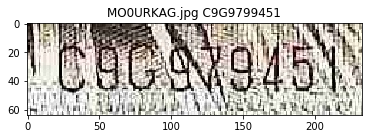

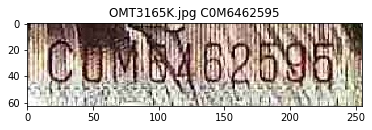

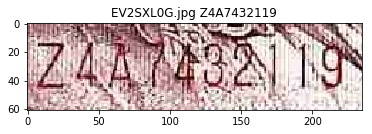

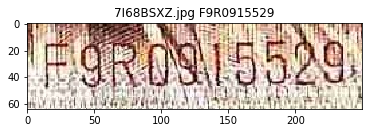

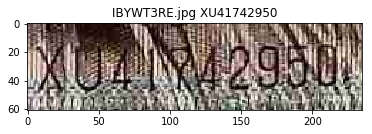

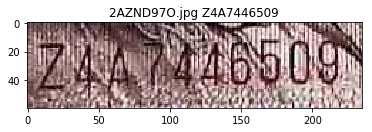

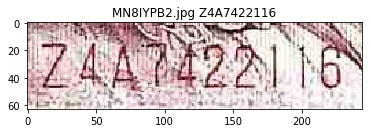

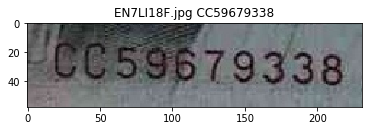

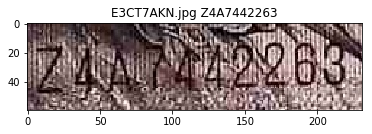

In [253]:
for column in jpg_name.split(',')[:]:
    img = cv2.imread('../data/data/'+column)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lbl = df_train_label[df_train_label['name'] == column][' label'].values[0].strip()
    
    print(column+' '+img_lbl)
    plt.figure()
    plt.imshow(img)
    plt.title(column+' '+img_lbl)

In [290]:
df1 = pd.read_csv('./tmp_rcnn_tta10_pb.csv')
df2 = pd.read_csv('./tmp_rcnn_tta10_pb_0.0221038.csv')
# submit_df = pd.read_csv('../multi-digit-pytorch/tmp_rcnn_tta10_cnn.csv')


In [291]:
df_diff = df1[df1['label'] != df2['label']]

In [278]:
from itertools import groupby


def find_maxlen_char(s):
    return max(sum(len(list(dups))) for _, dups in groupby(s))

In [282]:
df_diff[df_diff['label'].apply(lambda x: find_maxlen_char(x)) >= 3]

,name,label
1181,LGKHP9D2.jpg,TA31366692
1373,EUWTMBVP.jpg,WJ54386222
5850,2D9QKGRM.jpg,YO00004602


In [292]:
df_diff

,name,label
144,45SN16YA.jpg,AA77698211
3117,ZMG4BHLR.jpg,TM72009966
4464,GHFXQ51I.jpg,P4J2306505
4815,CGT7HBKM.jpg,RI41547983
7143,6G37TFKB.jpg,FW94482694
7221,3RTKA204.jpg,WL46950470
7395,GRCX27WS.jpg,HY03274549
8854,MO0URKAG.jpg,C9G9799451
